In [3]:
import networkx as nx
import pandas as pd

In [27]:
#Leemos la lista de aristas de la segunda temporada y guardamos el grafo con pesos en la variable G
aristas = pd.read_csv('Base de datos y su conversión\Segunda temporada\edgelist2.csv', sep=' ')
nodos = pd.read_csv('Base de datos y su conversión\Segunda temporada\\nodelist2.csv', sep=' ',header=0)
G = nx.from_pandas_edgelist(aristas,'Source','Target', 'Weight')



In [28]:
#Añadimos los atributos de los nodos
for row in nodos.iterrows():
    G.add_node(row[1][0], Pokedex=row[1][1], Pokemon=row[1][2], Tipo1=row[1][3], Tipo2=row[1][4])

In [30]:
#buscamos los pokemon que hayan salido en todos los capítulos
for x in G.degree():
    if x[1] >= 166:
        print(x)

(29, 167)
(67, 167)
(165, 167)


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

In [55]:
#Mostramos la información del grafo obtenido
print('Nº de nodos en el grafo:', len(G.nodes))
print('Nº de aristas en el grafo:', len(G.edges))
print('Tamaño de la componente gigante:',len(max(nx.connected_components(G))))
print('Número de componentes:',len(list(nx.connected_components(G))))
print('Camino corto de la componente gigante', round(nx.average_shortest_path_length(G.subgraph(max(nx.connected_components(G))).copy()),2))
print('Coeficiente de Clustering:', round(nx.average_clustering(G),2))
print('Densidad:',round(nx.density(G),4))
print('Diametro:',round(nx.diameter(G),3))
print()
grados = [val for (node, val) in G.degree()]
print('Información del grado')
print('----------------------------------')
print('Grado medio:', round(np.mean(grados),2))
print('Desviación típica:', round(np.std(grados),2))
print('Grado más alto:',np.amax(grados))
print('Grado más bajo:',np.amin(grados))

Nº de nodos en el grafo: 168
Nº de aristas en el grafo: 5196
Tamaño de la componente gigante: 168
Número de componentes: 1
Camino corto de la componente gigante 1.63
Coeficiente de Clustering: 0.78
Densidad: 0.3704
Diametro: 2

Información del grado
----------------------------------
Grado medio: 61.86
Desviación típica: 34.24
Grado más alto: 167
Grado más bajo: 9


Distribución de grado de la Red


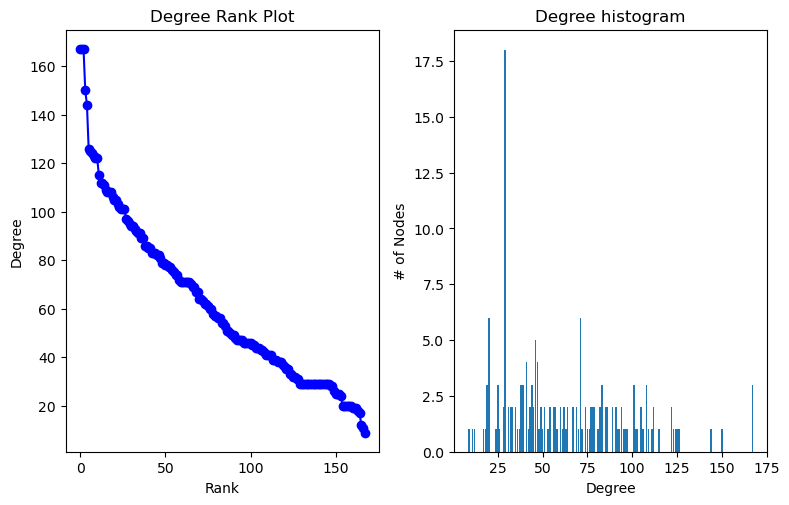

In [8]:
            print("Distribución de grado de la Red")
            degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

            dmax = max(degree_sequence)

            fig = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig.add_gridspec(5, 4)

            ax1 = fig.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

In [224]:
#Ahora vamos a ver la red completa con clasificación por colores de los nodos y tamaño según centralidad de intermediación
#y grosor de las aristas según el weight
tipos=[] 
color_map = []
for v in G:
    tipos.append(nx.get_node_attributes(G, 'Tipo1')[v]) 
len(tipos)
for i in G:
        if tipos[i] == 'Planta': #nodos con un solo vecino
            color_map.append('#2eb82e')
        elif tipos[i] == 'Fuego' : #nodos con un solo vecino
            color_map.append('red')
        elif tipos[i] == 'Agua': #nodos con un solo vecino
            color_map.append('blue')
        elif tipos[i] == 'Volador' : #nodos con un solo vecino
            color_map.append("#6699ff'")
        elif tipos[i] == 'Dragón' : #nodos con un solo vecino
            color_map.append("#6600cc")
        elif tipos[i] == 'Eléctrico' : #nodos con un solo vecino
            color_map.append('yellow')
        elif tipos[i] == 'Normal' : #nodos con un solo vecino
            color_map.append('black')
        elif tipos[i] == 'Veneno' : #nodos con un solo vecino
            color_map.append("#8c1aff")
        elif tipos[i] == 'Bicho' : #nodos con un solo vecino
            color_map.append("#99cc00")
        elif tipos[i] == 'Hada' : #nodos con un solo vecino
            color_map.append("#ffccff")
        elif tipos[i] == 'Tierra' : #nodos con un solo vecino
            color_map.append("#cca300")
        elif tipos[i] == 'Roca' : #nodos con un solo vecino
            color_map.append("#997300")
        elif tipos[i] == 'Psíquico' : #nodos con un solo vecino
            color_map.append("#f0288ad9")
        elif tipos[i] == 'Fantasma' : #nodos con un solo vecino
            color_map.append('grey')
        elif tipos[i] == 'Lucha' : #nodos con un solo vecino
            color_map.append("#b32d00")
        elif tipos[i] == 'Hielo' : #nodos con un solo vecino
            color_map.append("#98e6e6")
#Tamaño de los nodos según su c
node_size=[]
for d in G:
    if G.degree(d) == 167:
        tamaño=10 + (2.1*G.degree(d))
    else:
        tamaño=1 + (1.1*G.degree(d))
    node_size.append(tamaño) 
edge_width = [0.01 + 0.05*G[u][v]['Weight'] for u,v in G.edges()]
edge_color = [30 + 28973*G[u][v]['Weight'] for u,v in G.edges()]

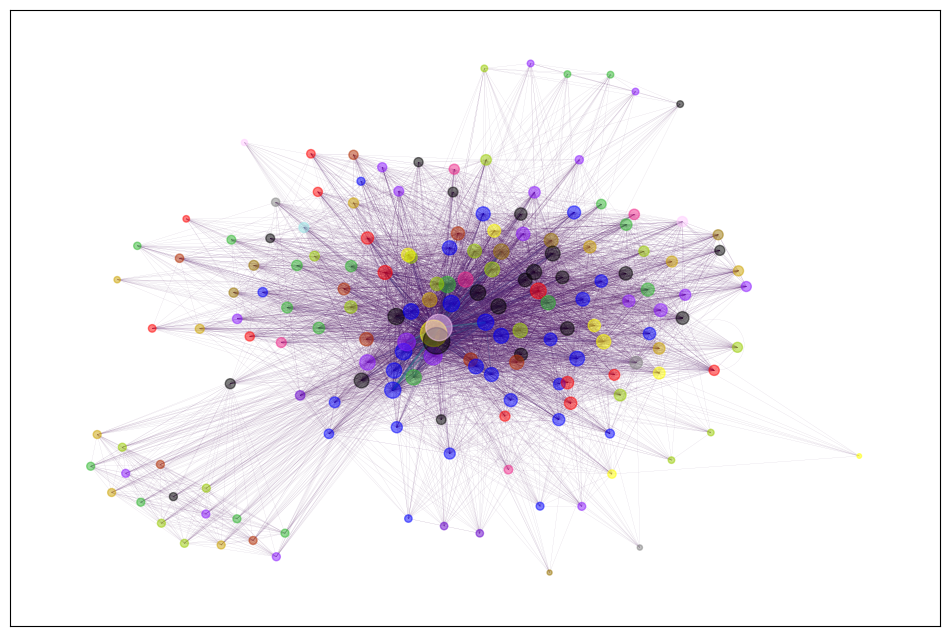

In [229]:
plt.figure(figsize=(12,8))

nx.draw_networkx(G, node_color=color_map, node_size=node_size, 
                 alpha=0.5, with_labels=False, 
                 width=edge_width, edge_color=edge_color)

 # Modelo de Configuración



Distribución de grado de la Red Nº  32


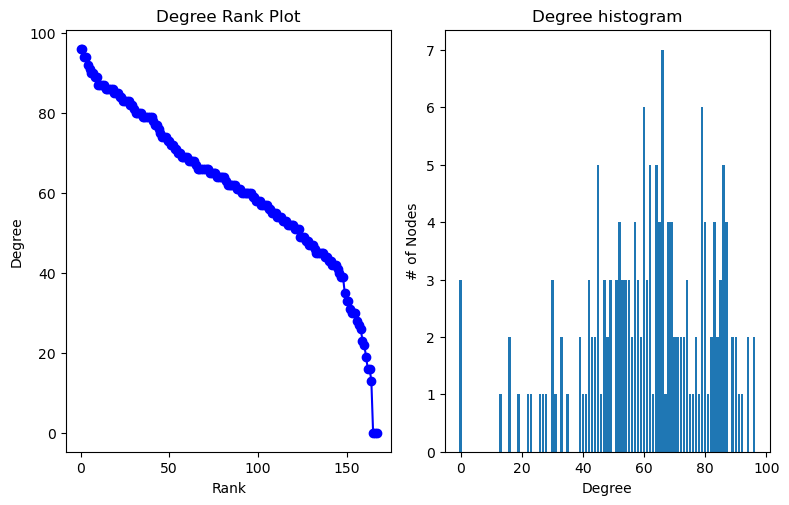

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 168.0
Número de aristas: 5134.84
Camino mínimo medio: 1.6
Grado medio: 61.13
Radio medio de la red 2.0
Diámetro medio de la red 2.9
Número de componentes conexas:  4
Media del coeficiente de clustering 0.43789
Coeficiente de clustering global 0.44208


In [67]:
# Red conforme a una secuencia de grados
#
# Podemos generar una red con una secuencia de grados dada
# Dicha secuencia puede seguir una determinada distribución, 
# por ejemplo, una uniforme, una normal, una ley de potencias, etc
# Sin embargo, la red resultante puede tener multi-enlaces y 
# auto-enlaces. La presencia de estos decrece si el número de nodos
# es alto con respecto al grado medio de la distribución.



N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
mean = [];
dt = [];
vmax = [];
vmin = []; 
# Generamos una secuencia de grados aleatoria que sigue
# una distribución normal de media 61 y desviación típica 34
# Generamos 40 grados (nuestra red tendrá 224 nodos)
valores_aleatorios = np.random.normal(83, 34, 168) 
# Truncamos los valores para tener números enteros
grados_aleatorios = valores_aleatorios.astype(int)
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
for x in range(50):
    #La suma de todos los grados de los nodos de la red debe ser par
        while sum(grados_aleatorios) % 2 != 0:
            valores_aleatorios = np.random.normal(83, 34, 168) 
            
            grados_aleatorios = valores_aleatorios.astype(int)
        
        grafo_redp1 = nx.configuration_model(grados_aleatorios)

        # Potencialmente la red puede tener múltiples enlaces (entre 
        # un mismo par de nodos). Para eliminarlos se hace lo siguiente
        grafo_redp1 = nx.Graph(grafo_redp1)

        # IDEM con los auto-enlaces (self-loops)
        grafo_redp1.remove_edges_from(nx.selfloop_edges(grafo_redp1))
        red1 = grafo_redp1
        grados = [val for (node, val) in red1.degree()]
        mean.append(np.mean(grados))
        dt.append(np.std(grados))
        vmax.append(np.amax(grados))
        vmin.append(np.amin(grados))

        N1 = N1 + red1.number_of_nodes()
        L1 = L1 + red1.number_of_edges()
        gradomedio1 += (2 * red1.number_of_edges())/ red1.number_of_nodes()
        clustering1 += nx.average_clustering(red1)
        clusterglobal1 += nx.transitivity(red1)
        #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
        conectado = nx.connected_components(red1)
        nrcomponentes += nx.number_connected_components(red1)
        maxconectado = max(conectado, key=len) 
        caminocorto1 += nx.average_shortest_path_length(red1.subgraph(max(nx.connected_components(red1))))
        radio1 += nx.radius(red1.subgraph(maxconectado))
        diametro1 += nx.diameter(red1.subgraph(maxconectado))
        
        if pintar_dist == x:
            print("Distribución de grado de la Red Nº ", x)
            degree_sequence = sorted((d for n, d in red1.degree()), reverse=True)
            dmax = max(degree_sequence)

            fig = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig.add_gridspec(5, 4)

            ax1 = fig.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

    
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))



# NOTA: Tanto al truncar/redondear los números de la normal, como al
# eliminar auto-enlaces y multi-enlaces alteramos ligeramente la secuencia
# pudiendo hacer que no se pueda ajustar a ella la distribución de origen 

### Modelo Erdos-Renyi

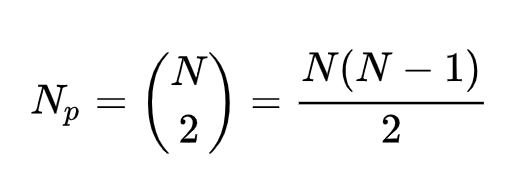

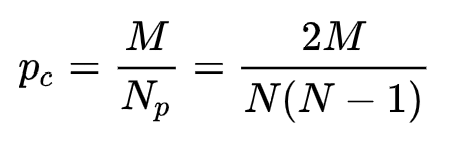

Distribución de grado de la Red1 Nº  34


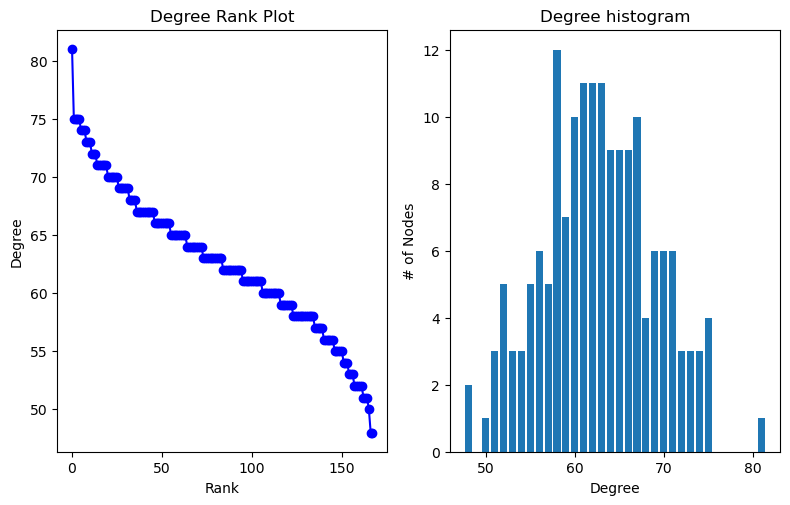

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 168.0
Número de aristas: 5174.92
Camino mínimo medio: 1.6
Grado medio: 61.61
Radio medio de la red 2.0
Diámetro medio de la red 2.0
Número de componentes conexas:  1
Media del coeficiente de clustering 0.36944
Coeficiente de clustering global 0.3693
Densidad 0.3689


In [83]:
k1 = (168*167)/2 
p1 = 5169/k1

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

# Modelamos la red con el modelo Erdos Renyi. 
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=densidad=0

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meaner1 = [];
dter1 = [];
vmaxer1 = [];
vminer1 = []; 
clustering1 = [];
#Variable con el número de nodos deseado para cada red
nodos1=168
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos1, p1)
    list_clstr = nx.clustering(red1,red1.nodes())
    cluster = list(list_clstr.values())
    meaner1.append(np.mean(cluster))
    dter1.append(np.std(cluster))
    vmaxer1.append(np.amax(cluster))
    vminer1.append(np.amin(cluster))
        
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 * red1.number_of_edges() / red1.number_of_nodes()
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += nx.average_shortest_path_length(red1.subgraph(max(nx.connected_components(red1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    densidad += nx.density(red1)
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(np.mean(meaner1),5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))
print('Densidad', round(densidad/50,5))

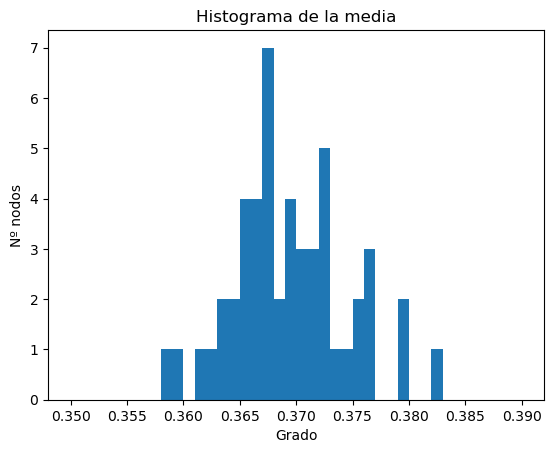

In [88]:
#Histograma de la media de las 50 redes
step = 0.001
bins = np.arange(0.35,0.39, step)
media = np.round(meaner1,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meaner1,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

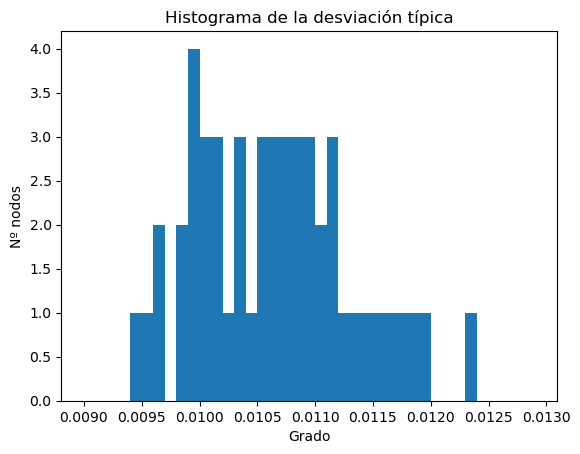

In [93]:
#Histograma de la desviación típica de las 50 redes
step = 0.0001
bins = np.arange(0.009,0.013, step)
desviacion = np.round(dter1,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dter1,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

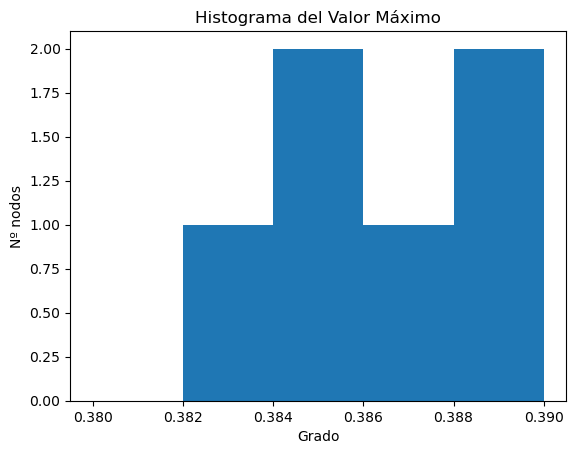

In [101]:
#Histograma del valor máximo de las 50 redes
step = 0.002
bins = np.arange(0.38,0.39, step)
maximo = np.round(vmaxer1,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxer1,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

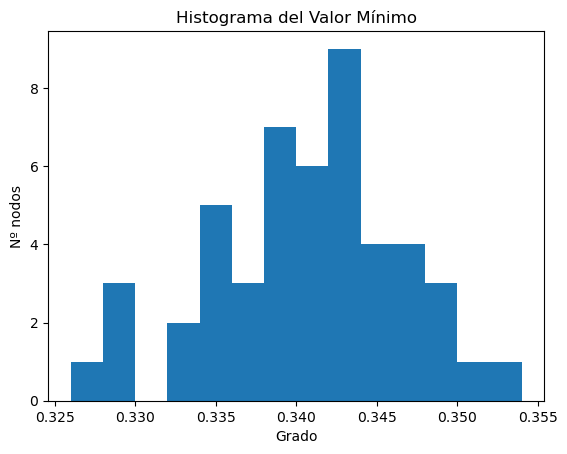

In [105]:
#Histograma del valor mínimo de las 50 redes
step = 0.002
bins = np.arange(0.326,0.356, step)
minimo = np.round(vminer1,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminer1,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

Distribución de grado de la Red1 Nº  40


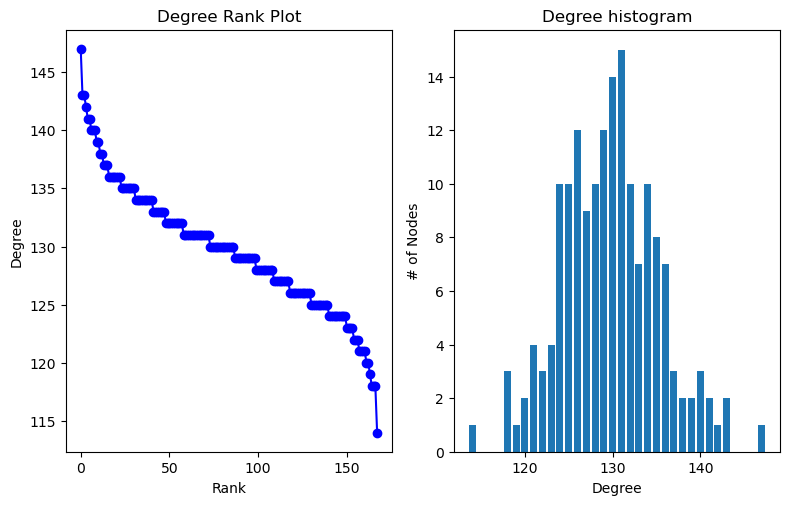

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 168.0
Número de aristas: 10935.32
Camino mínimo medio: 1.2
Grado medio: 130.18
Radio medio de la red 2.0
Diámetro medio de la red 2.0
Número de componentes conexas:  1
Media del coeficiente de clustering 0.77956
Coeficiente de clustering global 0.77952
Densidad 0.77954


In [106]:


#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

# Modelamos la red con el modelo Erdos Renyi. 
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=densidad=0

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meaner2 = [];
dter2 = [];
vmaxer2 = [];
vminer2 = []; 
clustering2 = [];
#Variable con el número de nodos deseado para cada red
nodos1=168
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos1, 0.78)
    list_clstr = nx.clustering(red1,red1.nodes())
    cluster = list(list_clstr.values())
    meaner2.append(np.mean(cluster))
    dter2.append(np.std(cluster))
    vmaxer2.append(np.amax(cluster))
    vminer2.append(np.amin(cluster))
        
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 * red1.number_of_edges() / red1.number_of_nodes()
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += nx.average_shortest_path_length(red1.subgraph(max(nx.connected_components(red1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    densidad += nx.density(red1)
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(np.mean(meaner2),5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))
print('Densidad', round(densidad/50,5))


0.7916251246261217

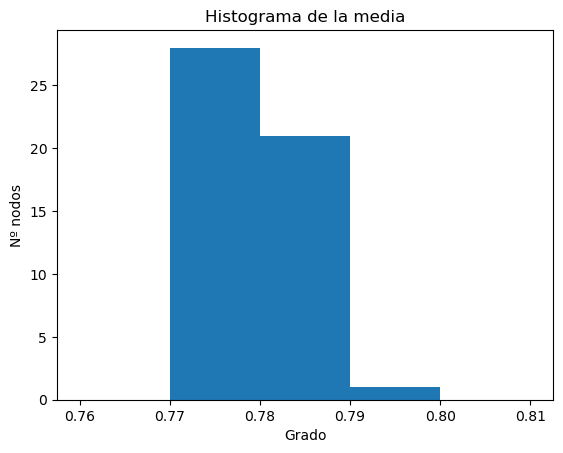

In [114]:
#Histograma de la media de las 50 redes
step = 0.01
bins = np.arange(0.76,0.81, step)
media = np.round(meaner2,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meaner2,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

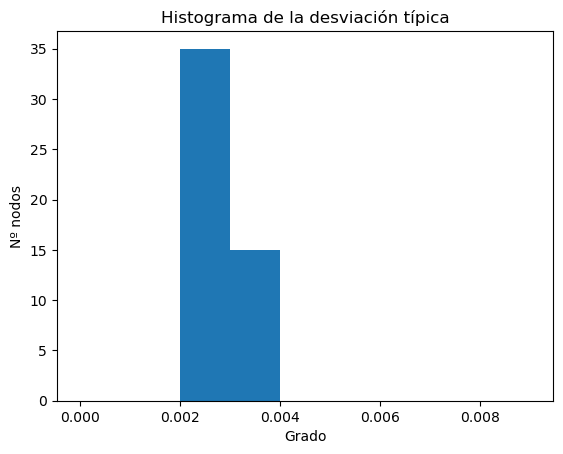

In [117]:
#Histograma de la desviación típica de las 50 redes
step = 0.001
bins = np.arange(0,0.01, step)
desviacion = np.round(dter2,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dter2,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

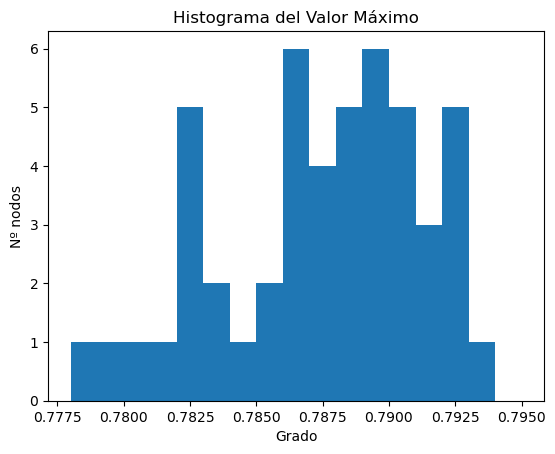

In [132]:
#Histograma del valor máximo de las 50 redes
step = 0.001
bins = np.arange(0.778,0.795, step)
maximo = np.round(vmaxer2,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxer2,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

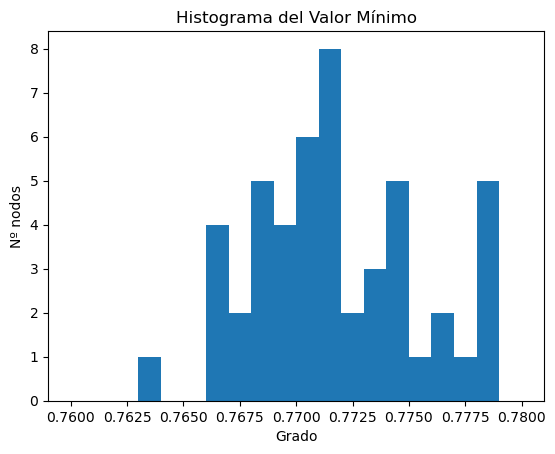

In [124]:
#Histograma del valor mínimo de las 50 redes
step = 0.001
bins = np.arange(0.76,0.78, step)
minimo = np.round(vminer2,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminer2,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

# Modelo Barabasi-Albert

Distribución de grado de la Red1 Nº  33


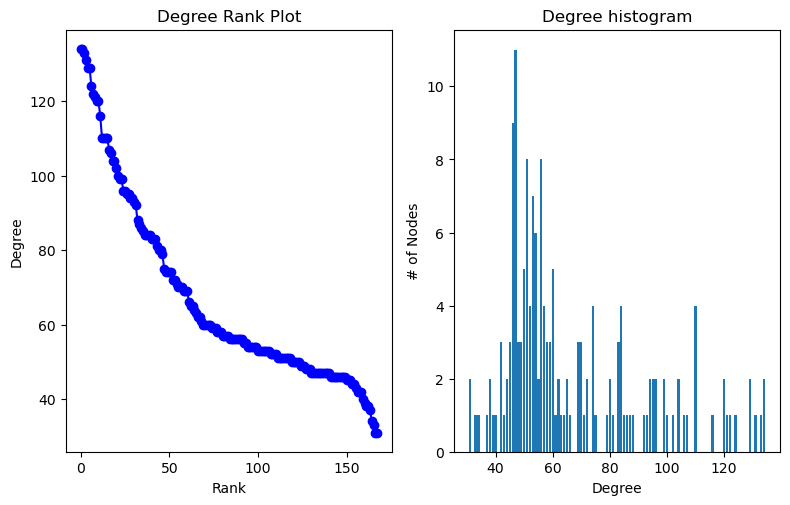

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 168.0
Número de aristas: 5612.0
Camino mínimo medio: 1.6
Grado medio: 66.81
Radio medio de la red 2.0
Diámetro medio de la red 2.0
Número de componentes conexas:  1.0
Media del coeficiente de clustering 0.51069
Coeficiente de clustering global 0.48196


In [139]:

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
#Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanba1 = [];
dtba1 = [];
vmaxba1 = [];
vminba1 = []; 
#Variable con el número de nodos deseado para cada red
nodos1=168
m=46
for x in range(50):
    red1 = nx.barabasi_albert_graph(nodos1,m)
    #variable para guardar los caminos mínimos medios de cada generación de red con el modelo BA
    grados = [val for (node, val) in red1.degree()]
    meanba1.append(np.mean(grados))
    dtba1.append(np.std(grados))
    vmaxba1.append(np.amax(grados))
    vminba1.append(np.amin(grados))
    
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += nx.average_shortest_path_length(red1.subgraph(max(nx.connected_components(red1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50,1))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))

# Modelo Watts-Strogatz

Distribución de grado de la Red1 Nº  32


<Figure size 640x480 with 0 Axes>

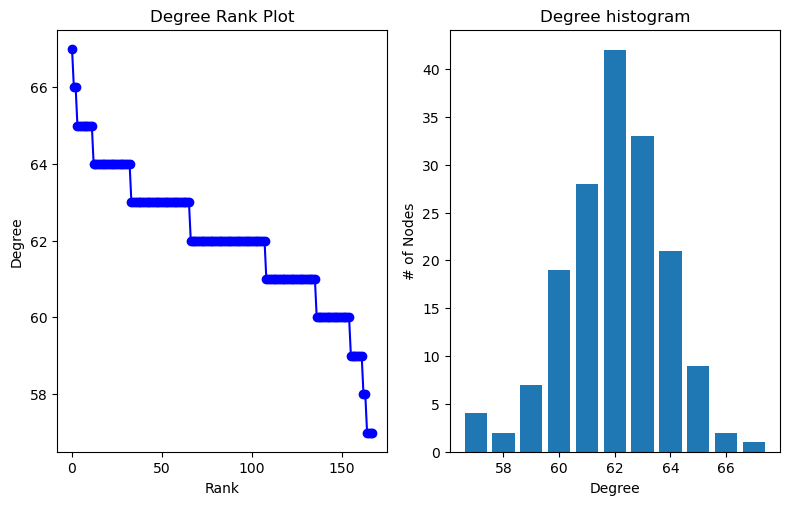

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 168.0
Número de aristas: 5208.0
Camino mínimo medio: 1.6
Grado medio: 62.0
Radio medio de la red 2.0
Diámetro medio de la red 3.0
Número de componentes conexas:  1
Media del coeficiente de clustering 0.65863
Coeficiente de clustering global 0.6579


In [150]:
# Modelo de red aleatoria de Watts-Strogatz, que es una evolución de Erdos-Renyi
# Tiene como parámetros principales:
#     - El número de nodos, 
#     - Los k vecinos adyacentes más cercanos a los que se conecta, y
#     - La probabilidad p de cambiar un enlace a un vecino por otro nodo cualquiera 
# Cuanto mayor es la probabilidad p más se para favorece el mundo pequeño, a la vez que el conectarse a los
# vecinos favorece el coeficiente de clustering (la existencia de triángulos en el vecindario) 
#
# Más info en: http://snap.stanford.edu/class/cs224w-readings/watts98smallworld.pdf
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanws1 = [];
dtws1 = [];
vmaxws1 = [];
vminws1 = []; 

num_nodos1 = 168
vecinos_adyacentes = 62 # Si es impar coge vecinos-1
probabilidad = 0.05

plt.figure()

for x in range(50):
    red1 = nx.watts_strogatz_graph(num_nodos1, vecinos_adyacentes, probabilidad)
    
    grados = [val for (node, val) in red1.degree()]
    meanws1.append(np.mean(grados))
    dtws1.append(np.std(grados))
    vmaxws1.append(np.amax(grados))
    vminws1.append(np.amin(grados))
    
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += nx.average_shortest_path_length(red1.subgraph(max(nx.connected_components(red1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))